In [1]:
from scipy.integrate import ode
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Hamiltonian(p1,p2,q1,q2, m, gamma):
    """
    DESCRIPTION
    Hamiltonian of the two point mass system (total energy)
    
    p1: momentum of first mass
    p2: momentum of second mass
    q1: position of first mass
    q2: position of second mass
    m:  mass
    gamma: friction coefficient
    
    H: total energy
    """
    
    H = 1/(2*m)*(p1**2+p2**2)+1/(2*gamma)*(q1-q2)**2
    
    return H


def f(t, y, A):
    """
    DESCRIPTION
    A: pre-defined matrix describing equation
    y: current values for p1,p2,q1,q2
    
    returns time derivatives of p1,p2,q1,q2
    """
    
    return np.dot(A, y)

In [3]:
# model properties
dt = 0.001
t  = np.arange(0,15,dt)

# constants
m     = 1    # mass
gamma = 0.5  # friction

# initial conditions
p1 = 0.1; p2 = -0.1; q1 = 1; q2 = 2
y_sol      = np.zeros((4,len(t)))
y_sol[:,0] = [p1,p2,q1,q2]

# matrix to calculate time derivative for p and q
A = np.zeros((4,4))
A[2,0] = 1/m
A[3,1] = 1/m
A[0,2] = -1/gamma
A[1,2] = 1/gamma
A[0,3] = 1/gamma
A[1,3] = -1/gamma

print("Matrix:\n{}\n".format(A))
print("Initial conditions:\n{}".format(y_sol[:,0]))

Matrix:
[[ 0.  0. -2.  2.]
 [ 0.  0.  2. -2.]
 [ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]]

Initial conditions:
[ 0.1 -0.1  1.   2. ]


In [4]:
# model
# dopri5; This is an explicit runge-kutta method of order (4)5
r = ode(f).set_integrator('dopri5').set_f_params(A)
r.set_initial_value(y = y_sol[:,0], t = 0)

for i in range(1, len(t)):
    y_sol[:,i] = r.integrate(r.t + dt)

Plots

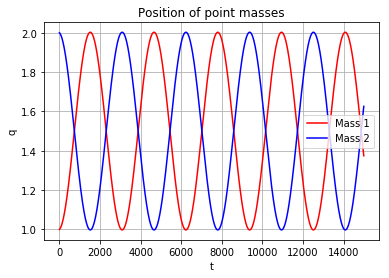

In [5]:
# time series: position
plt.plot(y_sol[2,:], label="Mass 1", color="red")
plt.plot(y_sol[3,:], label="Mass 2", color="blue")
plt.title("Position of point masses")
plt.xlabel("t")
plt.ylabel("q")
plt.legend()
plt.grid(True)
plt.show()

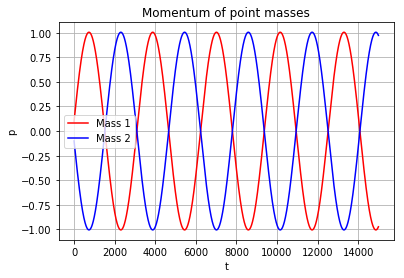

In [6]:
# time series: momentum
plt.plot(y_sol[0,:], label="Mass 1", color="red")
plt.plot(y_sol[1,:], label="Mass 2", color="blue")
plt.title("Momentum of point masses")
plt.xlabel("t")
plt.ylabel("p")
plt.legend()
plt.grid(True)
plt.show()

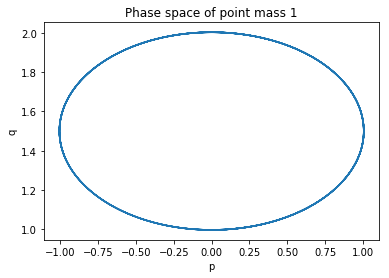

In [7]:
# Phase space
plt.plot(y_sol[0,:], y_sol[2,:])
plt.title("Phase space of point mass 1")
plt.xlabel("p")
plt.ylabel("q")
plt.show()

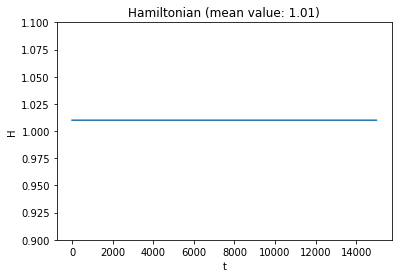

In [8]:
# Plot Hamiltonian (total energy)
H = Hamiltonian(p1=y_sol[0,:], p2=y_sol[1,:], 
                     q1=y_sol[2,:], q2=y_sol[3,:],
                     m=m, gamma=gamma)
H_mean = np.mean(H)
plt.plot(H)
plt.title("Hamiltonian (mean value: {})".format(round(H_mean,2)))
plt.xlabel("t")
plt.ylabel("H")
plt.ylim([0.9,1.1])
plt.show()